# covid19pt-forecasting

Blablabla

## Imports

In [1]:
import pandas as pd
import requests
import json

## Import data from DGS API

### API

In [3]:
response = requests.get("https://covid19-api.vost.pt/Requests/get_full_dataset")

In [11]:
data_dgs = response.json()

In [16]:
data_dgs_df = pd.DataFrame.from_dict(data_dgs)
data_dgs_df['data_dados'] = pd.to_datetime(data_dgs_df.data_dados, infer_datetime_format=True)
data_dgs_df = data_dgs_df.set_index('data_dados').sort_index()


In [18]:
display(data_dgs_df)

,data,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos
data_dados,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,27-02-2020,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,28-02-2020,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,29-02-2020,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,01-03-2020,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17,17-09-2020,66396,23984,5480,33960,1231,1304,241,196,NaN,...,113.0,148.0,230.0,705.0,554.0,936.0,952.0,NaN,NaN,19714.0
2020-09-18,18-09-2020,67176,24234,5526,34386,1267,1324,241,198,NaN,...,114.0,148.0,230.0,706.0,556.0,938.0,956.0,NaN,NaN,20229.0
2020-09-19,19-09-2020,68025,24522,5592,34825,1283,1359,241,203,NaN,...,114.0,149.0,230.0,708.0,558.0,941.0,958.0,NaN,NaN,20722.0


# Confirmed cases only

In [35]:
data_dgs_df_confirmed = data_dgs_df[['confirmados']]
# add missing days
all_days = pd.date_range(data_dgs_df_confirmed.index.min(), data_dgs_df_confirmed.index.max(), freq='D')
data_dgs_df_confirmed.reindex(all_days)

#data_dgs_df_confirmed = data_dgs_df_confirmed[data_dgs_df_confirmed['confirmados'] != 0] # drop days without information
display(data_dgs_df_confirmed)

,confirmados
data_dados,
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
2020-03-01,0
...,...
2020-09-17,66396
2020-09-18,67176
2020-09-19,68025


## Timeseries magic

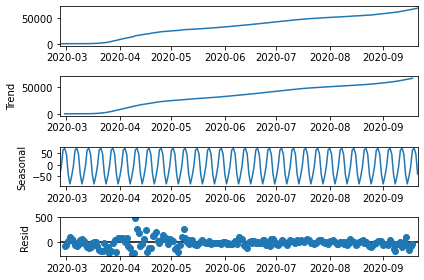

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data_dgs_df_confirmed = data_dgs_df_confirmed.asfreq('d')
data_dgs_df_confirmed = data_dgs_df_confirmed.fillna(method='bfill').fillna(method='ffill')

decomposition = seasonal_decompose(data_dgs_df_confirmed,  model='additive') #period = 30 WHAT DOES PERIOD DO?
decomposition.plot()
plt.show() 

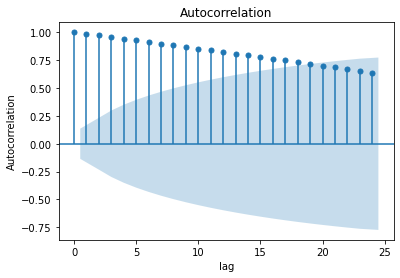

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_dgs_df_confirmed, alpha=0.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

### Make data stationary

In [51]:
data_dgs_df_confirmed_detrend = data_dgs_df_confirmed.diff().dropna()

/Users/inesmendes/miniconda3/envs/forecast/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


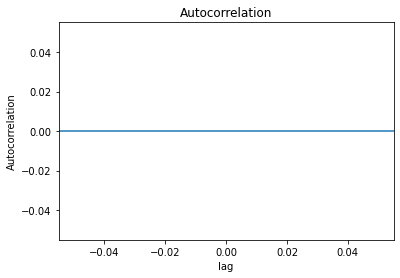

In [53]:
plot_acf(data_dgs_df_confirmed_detrend, alpha=0.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

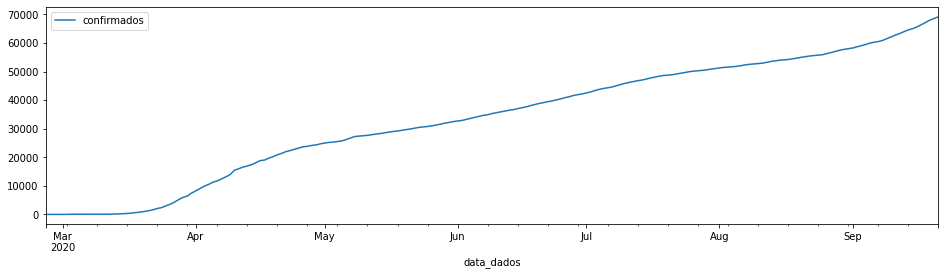

In [56]:
data_dgs_df_confirmed.plot(figsize=(16, 4));

In [64]:
import pmdarima as pm

sarimax = pm.AutoARIMA(seasonal=False, trace=False, supress_warnings=True, method='nm', maxiter=20)
sarimax.fit(data_dgs_df_confirmed)

ImportError: cannot import name 'periodogram' from 'statsmodels.tsa.stattools' (/Users/inesmendes/miniconda3/envs/forecast/lib/python3.8/site-packages/statsmodels/tsa/stattools.py)